In [1]:
import os
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import decode_predictions,preprocess_input
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import os
trainPATH='data/dogscats/train/'
os.listdir(trainPATH)

['cats', 'dogs']

In [4]:
listofcats=os.listdir(trainPATH+'cats')
listofdogs=os.listdir(trainPATH+'dogs')
print("No of trainable images of cats and dogs="+str(len(listofcats))+' '+str(len(listofdogs)))

No of trainable images of cats and dogs=11500 11500


(337, 288, 3)

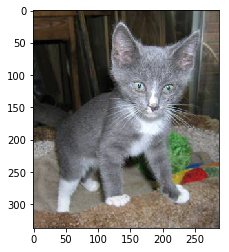

In [5]:
img=load_img(trainPATH+'cats/'+listofcats[445])
plt.imshow(img)
img=img_to_array(img)
img.shape

In [2]:
bottom_model=VGG16(include_top=False,input_shape=(224,224,3))

In [3]:
# Freeze the layers except the last 4 layers
for layer in bottom_model.layers[:-2]:
    layer.trainable = False

# check the trainable status of the individual layers
for layer in bottom_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7faa25a1fb38> False
<keras.layers.convolutional.Conv2D object at 0x7faa25a1fdd8> False
<keras.layers.convolutional.Conv2D object at 0x7faa25a1fbe0> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa25a1fd68> False
<keras.layers.convolutional.Conv2D object at 0x7faa24fc96d8> False
<keras.layers.convolutional.Conv2D object at 0x7faa24fe9d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa24ffccf8> False
<keras.layers.convolutional.Conv2D object at 0x7faa24f8dfd0> False
<keras.layers.convolutional.Conv2D object at 0x7faa24fa49b0> False
<keras.layers.convolutional.Conv2D object at 0x7faa24fb6eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa24f5df28> False
<keras.layers.convolutional.Conv2D object at 0x7faa24f72cf8> False
<keras.layers.convolutional.Conv2D object at 0x7faa24f08240> False
<keras.layers.convolutional.Conv2D object at 0x7faa24f1bfd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7faa24ec2f60>

In [4]:
bottom_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
#Adding Top Layers to classify between cat and dog

from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
with tf.device("/gpu:0"):
    model=Sequential()
    model.add(bottom_model)
    model.add(Flatten(input_shape=bottom_model.output_shape))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 8,782,849
Non-trainable params: 12,354,880
_________________________________________________________________


In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
# Change the batchsize according to system RAM/GPU
train_batchsize = 100
image_size=224 
train_dir='data/dogscats/train'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        classes=['dogs','cats'],
        class_mode='binary')

Found 23000 images belonging to 2 classes.


In [11]:
from keras import optimizers# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Fit your Model

In [12]:
# with tf.device("/device:GPU:0"):
#     model.fit_generator(train_generator,
#                     steps_per_epoch=train_generator.samples/train_generator.batch_size,
#                     epochs=5)
#model.save_weights('dogcats_weights.h5')

In [6]:
model.load_weights('dogcats_weights.h5')

In [7]:
testPATH='data/dogscats/test1/'
os.listdir('data/dogscats/test1/')

['8383.jpg',
 '6595.jpg',
 '11682.jpg',
 '5699.jpg',
 '4392.jpg',
 '11992.jpg',
 '3779.jpg',
 '5206.jpg',
 '11265.jpg',
 '3079.jpg',
 '10701.jpg',
 '1987.jpg',
 '2161.jpg',
 '4389.jpg',
 '3158.jpg',
 '5321.jpg',
 '6165.jpg',
 '519.jpg',
 '9753.jpg',
 '10422.jpg',
 '2229.jpg',
 '1067.jpg',
 '6448.jpg',
 '9518.jpg',
 '6303.jpg',
 '1500.jpg',
 '7731.jpg',
 '11768.jpg',
 '5495.jpg',
 '8916.jpg',
 '9126.jpg',
 '9037.jpg',
 '4335.jpg',
 '8539.jpg',
 '11292.jpg',
 '9564.jpg',
 '8989.jpg',
 '1943.jpg',
 '10708.jpg',
 '8517.jpg',
 '2545.jpg',
 '6983.jpg',
 '5171.jpg',
 '11280.jpg',
 '2430.jpg',
 '9011.jpg',
 '438.jpg',
 '5964.jpg',
 '10130.jpg',
 '12435.jpg',
 '10369.jpg',
 '4789.jpg',
 '9895.jpg',
 '2880.jpg',
 '7636.jpg',
 '8710.jpg',
 '12173.jpg',
 '2915.jpg',
 '3660.jpg',
 '12303.jpg',
 '11516.jpg',
 '7666.jpg',
 '4822.jpg',
 '9477.jpg',
 '7447.jpg',
 '4410.jpg',
 '5325.jpg',
 '3869.jpg',
 '6508.jpg',
 '11366.jpg',
 '2404.jpg',
 '8265.jpg',
 '6842.jpg',
 '6497.jpg',
 '6116.jpg',
 '3426.jpg'

In [8]:
listoftestimages=os.listdir(testPATH)
print("No of test imagess="+str(len(listoftestimages)))

No of test imagess=12500


In [11]:
def predict(path):
    img=load_img(path,target_size=(224,224,3))
    plt.figure()
    plt.imshow(img)
    img=img_to_array(img)
    testimages=img.reshape((1,224, 224, 3))
    out=np.squeeze(model.predict_classes(testimages))
    prob=np.squeeze(model.predict_proba(testimages))
    model.evaluate()
    if out==0:
        plt.xlabel('dog' +str(prob))
    elif out==1:
        plt.xlabel('cat'+str(prob))

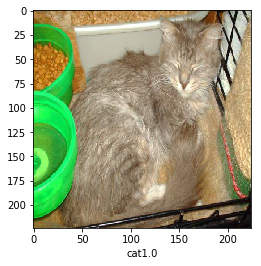

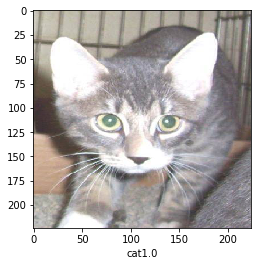

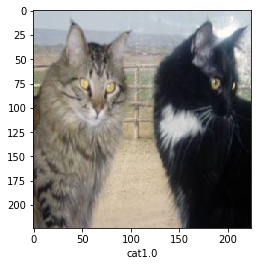

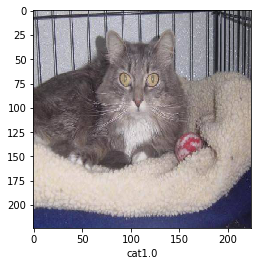

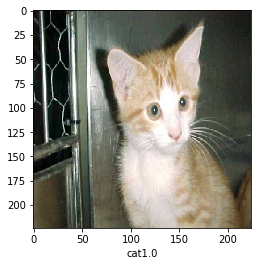

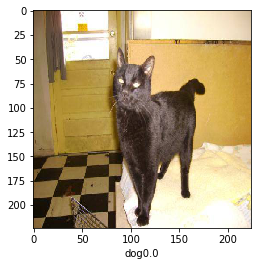

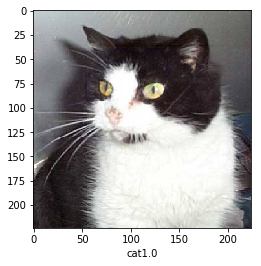

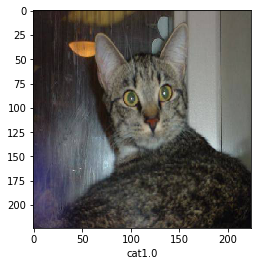

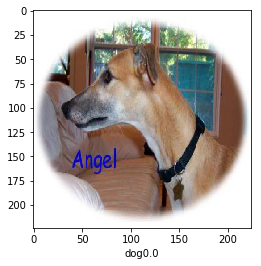

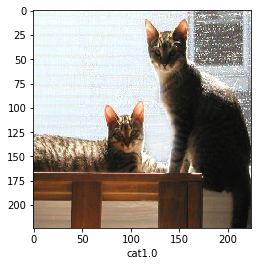

In [12]:
#Testing Some of test images
import numpy as np
for i in listoftestimages[0:10]:
    predict(testPATH+i)

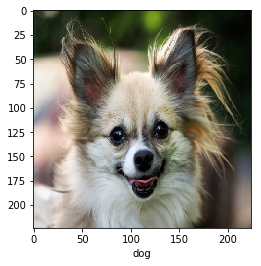

In [15]:
img=load_img('catlikedog.jpg',target_size=(224,224,3))
plt.figure()
plt.imshow(img)
img=img_to_array(img)
testimages=img.reshape((1,224, 224, 3))
out=np.squeeze(model.predict_classes(testimages))
if out==0:
    plt.xlabel('dog')
elif out==1:
    plt.xlabel('cat')